In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [3]:
def Initial_condition(den):
    Graph=nx.read_gpickle('Graph.gpickle')
    for i in Graph.nodes:
        if den>np.random.rand():
            Graph.nodes[i]['x']=1
        else:
            Graph.nodes[i]['x']=0
    x=np.random.randint(50)
    y=np.random.randint(50)
    Graph.nodes[x,y]['x']=2
    return Graph

In [4]:
def Move_it():
    for i in G.nodes:
        if G.nodes[i]['x']!=0:
            ret=0
            adjnum=4
            adj=list(G.adj[i])
            while ret==0 and adjnum>0:
                r=np.random.randint(adjnum)
                if adj[r]==0:
                    G.nodes[adj[r]]['x']=G.nodes[i]['x']
                    G.nodes[i]['x']=0
                    ret=1
                adj.remove(adj[r])
                adjnum-=1

In [5]:
def Count_nodes(Graph):
    snode=[]
    inode=[]
    rnode=[]
    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']==1:
            snode.append(n_1)
        if Graph.nodes[n_1]['x']==2:
            inode.append(n_1)  
        if Graph.nodes[n_1]['x']==3:
            rnode.append(n_1)
    return (snode,inode,rnode)

In [6]:
def Transmition(d,p,q,snode,inode):
    for i in snode:
        for j in inode:
            if nx.shortest_path_length(G, source=i, target=j)<d and p>np.random.rand():
                G.nodes[i]['x']=2
    for i in inode:
        if q>np.random.rand():
            G.nodes[i]['x']=3

In [7]:
def dynamic(d,p,q):
    (snode,inode,rnode)=Count_nodes(G)
    while len(inode)!=0:
        Move_it()
        (snode,inode,rnode)=Count_nodes(G)
        Transmition(d,p,q,snode,inode)
    return len(rnode)

In [8]:
G=Initial_condition(0.02)
dynamic(5,0.6,1)

1

In [9]:
dlist=[5,10,15,20,25]
rdata=[[],[],[],[],[]]
for d in dlist:
    for i in range(1000):
        G=Initial_condition(0.02)
        rdata[dlist.index(d)].append(dynamic(d,0.5,1)) 

In [10]:
Cs = []
for r in rdata:
    c = []
    for n in set(r):
        c.append(r.count(n))
    Cs.append(c)    

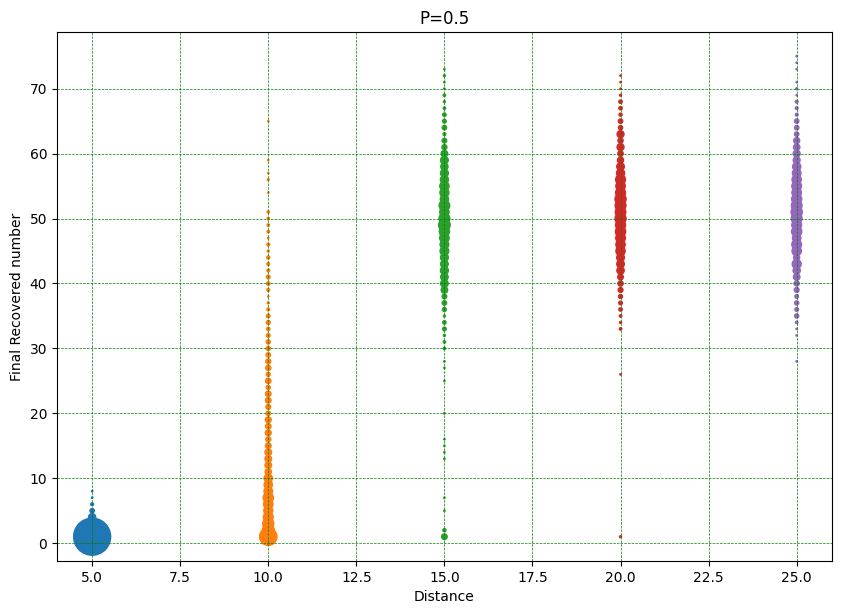

In [16]:
plt.figure(figsize=(10,7),dpi=100)
plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
plt.title('P=0.5')
plt.xlabel('Distance')
plt.ylabel('Final Recovered number')
for i in range(5):
    plt.scatter(dlist[i]*np.ones_like(Cs[i]),list(set(rdata[i])),s=Cs[i],marker='o')
plt.savefig('fig2-1')

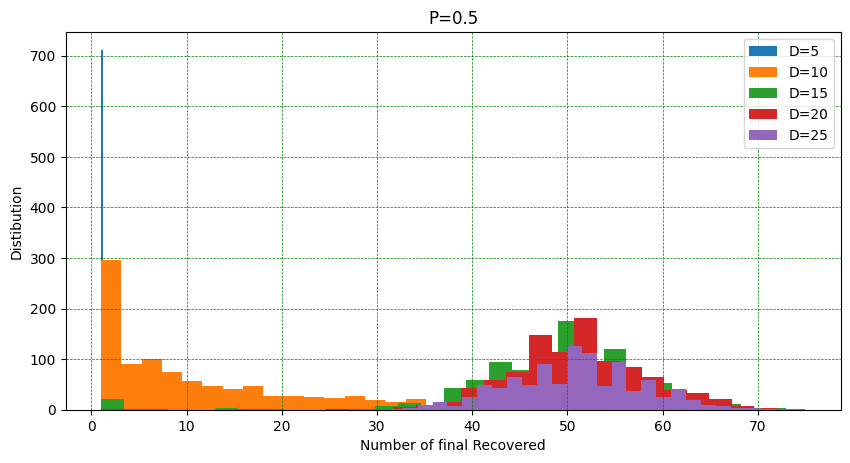

In [20]:
plt.figure(figsize=(10,5),dpi=100)
plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
plt.xlabel('Number of final Recovered')
plt.ylabel('Distibution')
plt.title('P=0.5')
for i in range(5):
    plt.hist(rdata[i],bins=30,label='D={}'.format(dlist[i]))
plt.legend(loc=0)
plt.savefig('fig2-2h'.format(i))

In [21]:
np.save('a2.npy',rdata)